# Problem Statement

####  A car company has relesed a new SUV,we have to predict wheahter the customers will buy the SUV based on the previous about thier previous SVU's


## steps followed are
* Importing the packages
* Data Analysing
* Train and test split
* accuracy

## 1.Importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
car = pd.read_csv('SUV_Purchase.csv')
car.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print("no of persons purchsed SUV in original data:"+str(len(car.index)))

no of persons purchsed SUV in original data:400


## 2. Data Analysing

<AxesSubplot:xlabel='Purchased', ylabel='count'>

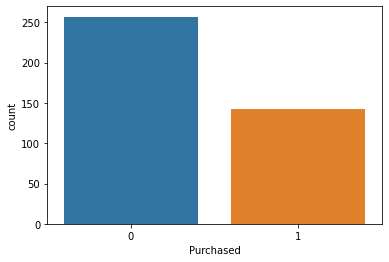

In [5]:
sns.countplot(x="Purchased", data=car)

In [7]:
car.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

##### SO,by seeing the snsplot and as well the value counts out of the 400 customers majorly we can see the persons who didnt bought the SVM 

<AxesSubplot:xlabel='Purchased', ylabel='count'>

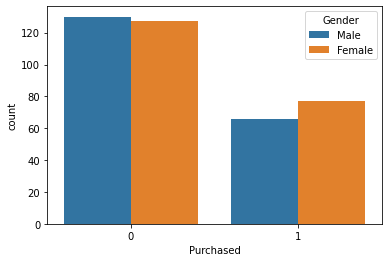

In [8]:
sns.countplot(x="Purchased",hue="Gender", data=car)

#### By seeing the above plot,majorly female have been purchased SVM

<AxesSubplot:xlabel='Purchased', ylabel='count'>

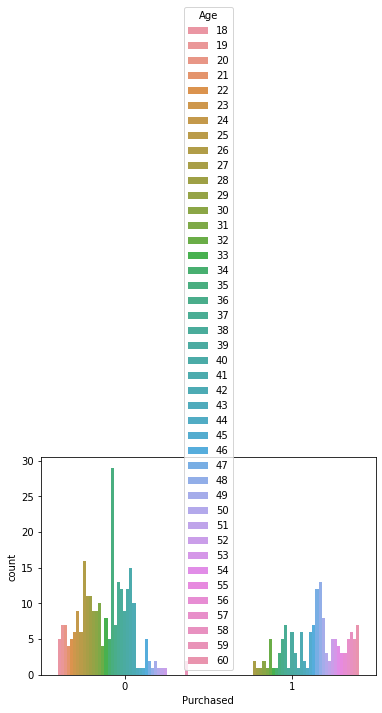

In [10]:
sns.countplot(x="Purchased",hue="Age", data=car)

#### Middle age have been purchased the Svm

<AxesSubplot:ylabel='Frequency'>

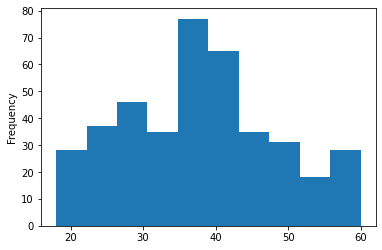

In [13]:
car["Age"].plot.hist()  #so by histogram also same we can see from 32 to 34 age group

<AxesSubplot:ylabel='Frequency'>

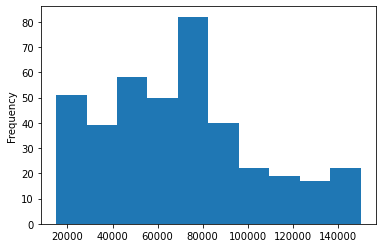

In [15]:
car["EstimatedSalary"].plot.hist() ## so i can see the majorly the salary who have 70k salary have been purchased


In [16]:
car.isnull().sum()  # so,we can see here there is no null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
car.drop(['User ID','Gender'],axis=1,inplace=True)

In [19]:
car.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## 3.Training the data

In [20]:
X = car.iloc[:,:-1]
y = car.Purchased

In [21]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
from sklearn.preprocessing import StandardScaler  #to scale the data

In [34]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## 4.Accuracy

In [43]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)*100

84.0909090909091

In [44]:
confusion_matrix(y_test,y_predict)

array([[79,  1],
       [20, 32]], dtype=int64)

In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        80
           1       0.97      0.62      0.75        52

    accuracy                           0.84       132
   macro avg       0.88      0.80      0.82       132
weighted avg       0.87      0.84      0.83       132

